### Approximating the integral

It is easy to see that as we use large $n$ (i.e., more qubits) and thus larger $b_{\mbox{max}}$, we can approximate the integral better as illustrated below. 

In [1]:
import math

b_max = math.pi / 100  # upper limit of integral # 5
nbit = 10  # change this value to get discretized result closer to analytical results # 3

analyticResult = (b_max / 2.0 - math.sin(2 * b_max) / 4.0 ) / b_max  # the target integral can be analytically solved
print("Analytical Result:", analyticResult)

ndiv = 2**nbit  #number of discretization 
discretizedResult = 0.0
for i in range(ndiv):
    discretizedResult += math.sin(b_max / ndiv * (i + 0.5))**2
discretizedResult = discretizedResult / ndiv
print("Discretized Result:", discretizedResult)

Analytical Result: 0.00032892188007938847
Discretized Result: 0.0003289218016943769


In [2]:
import sys
sys.path.append('../libmitigation')

In [3]:
#Preparing qiskit environment
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import IBMQ
from qiskit import Aer
from scipy import optimize
import sys, time
import mpmath as mp
import numpy as np
import matplotlib.pyplot as plt
import pickle
np.random.seed(42)
seed = 42

/Users/yangbo/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/qiskit/__init__.py:67: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of the 0.17.0 release. Support for running Qiskit with Python 3.6 will be removed in a future release.
  DeprecationWarning,


In [4]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import depolarizing_error
import qiskit.ignis.mitigation as mit
from qiskit.ignis.mitigation.measurement import tensored_meas_cal, TensoredMeasFitter
from lib_grover import *

In [5]:
import importlib
from inv_sgs import InvSGS
from inv_s_sgs import InvSSGS
from inv_lm_sgs import InvLMSGS
from inv_s_lm_sgs import InvSLMSGS
from inv_s_lm0_sgs import InvSLM0SGS
from inv_s_lmk_sgs import InvSLMkSGS
from mooney_etal import MooneyEtal
from sgs_algorithm import sgs_algorithm
from inv_s_scipy import InvSSciPy
from inv_s_scipy_sgs import InvSSciPySGS

## Testing the algorithm with simulators

Let us run the algorithm with simulators

In [6]:
#setting the number of shots and Grover operators.
max_iter = 100
# number_grover_list = [0, 1, 2, 4, 8, 16, 32] # , 64, 128, 256]  # list of number of Grover operators
number_grover_list = [5 * i for i in range(20)]
shots_list = [100] * len(number_grover_list) # list of number of shots
if len(shots_list) != len(number_grover_list):
    raise Exception(
        'The length of shots_list should be equal to the length of number_grover_list.'
    )

backend = Aer.get_backend('qasm_simulator')

In [7]:
noise_model = NoiseModel()
for qi in range(nbit+1):
    if qi >= 0:
        read_err = ReadoutError([[0.95, 0.05],[0.05,0.95]])
        noise_model.add_readout_error(read_err, [qi])

Finally, we can run the algorithm as below: 

In [8]:
qc_list = create_grover_circuit(number_grover_list, nbit,b_max)  # list of Grover circuits

In [9]:
t1 = time.time()
counts_lists = []
max_iter = 100
for i in range(max_iter):
    counts_list = run_grover(qc_list, number_grover_list, shots_list, backend, noise_model=noise_model, seed_transpiler=i, seed_simulator=i)  # list of number of grover operators
    counts_lists.append(counts_list)
    with open("p005_q005_piover100.pkl", "wb") as f:
        pickle.dump(counts_lists, f)
    print("iter", i, "finished")
t2 = time.time()
print(t2-t1)

0 th round with 0 oracles
0.21923518180847168 s
1 th round with 5 oracles
1.0497400760650635 s
2 th round with 10 oracles
2.1872289180755615 s
3 th round with 15 oracles
3.3591949939727783 s
4 th round with 20 oracles
6.008026123046875 s
5 th round with 25 oracles
7.901341915130615 s
6 th round with 30 oracles
8.439738988876343 s
7 th round with 35 oracles
9.505189895629883 s
8 th round with 40 oracles
7.994908332824707 s
9 th round with 45 oracles
8.341207027435303 s
10 th round with 50 oracles
7.909051895141602 s
11 th round with 55 oracles
10.598785161972046 s
12 th round with 60 oracles
11.088073015213013 s
13 th round with 65 oracles
9.395066022872925 s
14 th round with 70 oracles
9.687222003936768 s
15 th round with 75 oracles
10.303015947341919 s
16 th round with 80 oracles
11.203659772872925 s
17 th round with 85 oracles
12.131052017211914 s
18 th round with 90 oracles
12.227139234542847 s
19 th round with 95 oracles
13.801664113998413 s
iter 0 finished
0 th round with 0 oracle

4.3925697803497314 s
9 th round with 45 oracles
4.9643518924713135 s
10 th round with 50 oracles
5.8375468254089355 s
11 th round with 55 oracles
6.33016300201416 s
12 th round with 60 oracles
6.67169713973999 s
13 th round with 65 oracles
7.241214990615845 s
14 th round with 70 oracles
7.670877933502197 s
15 th round with 75 oracles
8.394346952438354 s
16 th round with 80 oracles
8.874958038330078 s
17 th round with 85 oracles
9.230938196182251 s
18 th round with 90 oracles
10.419847011566162 s
19 th round with 95 oracles
10.757378816604614 s
iter 8 finished
0 th round with 0 oracles
0.013250112533569336 s
1 th round with 5 oracles
0.6043918132781982 s
2 th round with 10 oracles
1.278106927871704 s
3 th round with 15 oracles
1.6649301052093506 s
4 th round with 20 oracles
2.2016680240631104 s
5 th round with 25 oracles
2.7323341369628906 s
6 th round with 30 oracles
3.3375020027160645 s
7 th round with 35 oracles
3.863673686981201 s
8 th round with 40 oracles
4.540498971939087 s
9 th 

9.781366109848022 s
18 th round with 90 oracles
10.400645971298218 s
19 th round with 95 oracles
10.256317853927612 s
iter 16 finished
0 th round with 0 oracles
0.014984846115112305 s
1 th round with 5 oracles
0.5955159664154053 s
2 th round with 10 oracles
1.1425981521606445 s
3 th round with 15 oracles
1.6693670749664307 s
4 th round with 20 oracles
2.1570401191711426 s
5 th round with 25 oracles
2.6395151615142822 s
6 th round with 30 oracles
3.230333089828491 s
7 th round with 35 oracles
4.037894010543823 s
8 th round with 40 oracles
4.29827618598938 s
9 th round with 45 oracles
4.830283880233765 s
10 th round with 50 oracles
5.638487815856934 s
11 th round with 55 oracles
5.886007070541382 s
12 th round with 60 oracles
6.606412887573242 s
13 th round with 65 oracles
7.4606311321258545 s
14 th round with 70 oracles
7.8836510181427 s
15 th round with 75 oracles
9.108022928237915 s
16 th round with 80 oracles
9.013166189193726 s
17 th round with 85 oracles
9.254286289215088 s
18 th r

3.3844027519226074 s
7 th round with 35 oracles
3.8598480224609375 s
8 th round with 40 oracles
4.313855886459351 s
9 th round with 45 oracles
5.185031890869141 s
10 th round with 50 oracles
5.67986273765564 s
11 th round with 55 oracles
5.8331780433654785 s
12 th round with 60 oracles
6.686913967132568 s
13 th round with 65 oracles
7.159569263458252 s
14 th round with 70 oracles
7.698297023773193 s
15 th round with 75 oracles
8.109684944152832 s
16 th round with 80 oracles
8.831388235092163 s
17 th round with 85 oracles
9.230187892913818 s
18 th round with 90 oracles
9.842493057250977 s
19 th round with 95 oracles
10.078638076782227 s
iter 25 finished
0 th round with 0 oracles
0.017257213592529297 s
1 th round with 5 oracles
0.6009490489959717 s
2 th round with 10 oracles
1.275636911392212 s
3 th round with 15 oracles
1.9646711349487305 s
4 th round with 20 oracles
2.1918609142303467 s
5 th round with 25 oracles
2.67018985748291 s
6 th round with 30 oracles
3.3006250858306885 s
7 th r

8.296083927154541 s
16 th round with 80 oracles
8.585419178009033 s
17 th round with 85 oracles
9.02965521812439 s
18 th round with 90 oracles
10.196612119674683 s
19 th round with 95 oracles
10.420562982559204 s
iter 33 finished
0 th round with 0 oracles
0.019176959991455078 s
1 th round with 5 oracles
0.6044197082519531 s
2 th round with 10 oracles
1.1264171600341797 s
3 th round with 15 oracles
1.5964527130126953 s
4 th round with 20 oracles
2.118582010269165 s
5 th round with 25 oracles
2.6400880813598633 s
6 th round with 30 oracles
3.2851572036743164 s
7 th round with 35 oracles
3.866442918777466 s
8 th round with 40 oracles
4.3717262744903564 s
9 th round with 45 oracles
5.016624927520752 s
10 th round with 50 oracles
5.422651052474976 s
11 th round with 55 oracles
5.912074089050293 s
12 th round with 60 oracles
6.416001796722412 s
13 th round with 65 oracles
7.115172863006592 s
14 th round with 70 oracles
7.442425012588501 s
15 th round with 75 oracles
8.397861003875732 s
16 th

2.1612329483032227 s
5 th round with 25 oracles
2.752558946609497 s
6 th round with 30 oracles
3.2497401237487793 s
7 th round with 35 oracles
3.8250858783721924 s
8 th round with 40 oracles
4.5042853355407715 s
9 th round with 45 oracles
4.986259937286377 s
10 th round with 50 oracles
5.277987957000732 s
11 th round with 55 oracles
6.024219751358032 s
12 th round with 60 oracles
6.440181016921997 s
13 th round with 65 oracles
7.09264612197876 s
14 th round with 70 oracles
7.656861782073975 s
15 th round with 75 oracles
8.259156942367554 s
16 th round with 80 oracles
8.876412153244019 s
17 th round with 85 oracles
9.4407320022583 s
18 th round with 90 oracles
9.78298306465149 s
19 th round with 95 oracles
10.19614315032959 s
iter 42 finished
0 th round with 0 oracles
0.022080183029174805 s
1 th round with 5 oracles
0.5847487449645996 s
2 th round with 10 oracles
1.1167957782745361 s
3 th round with 15 oracles
1.6633248329162598 s
4 th round with 20 oracles
2.204946994781494 s
5 th roun

6.878826141357422 s
14 th round with 70 oracles
7.650961875915527 s
15 th round with 75 oracles
7.985521078109741 s
16 th round with 80 oracles
8.595499038696289 s
17 th round with 85 oracles
9.267992973327637 s
18 th round with 90 oracles
9.788151979446411 s
19 th round with 95 oracles
10.607661247253418 s
iter 50 finished
0 th round with 0 oracles
0.02318716049194336 s
1 th round with 5 oracles
0.5876119136810303 s
2 th round with 10 oracles
1.0935828685760498 s
3 th round with 15 oracles
1.633854866027832 s
4 th round with 20 oracles
2.1409618854522705 s
5 th round with 25 oracles
2.6678271293640137 s
6 th round with 30 oracles
3.3017139434814453 s
7 th round with 35 oracles
3.9755170345306396 s
8 th round with 40 oracles
4.240860223770142 s
9 th round with 45 oracles
4.737485885620117 s
10 th round with 50 oracles
6.2706687450408936 s
11 th round with 55 oracles
6.056679010391235 s
12 th round with 60 oracles
6.4120259284973145 s
13 th round with 65 oracles
7.06489109992981 s
14 th

0.9555509090423584 s
2 th round with 10 oracles
1.6576271057128906 s
3 th round with 15 oracles
2.4998936653137207 s
4 th round with 20 oracles
3.300143003463745 s
5 th round with 25 oracles
4.028154134750366 s
6 th round with 30 oracles
6.027427911758423 s
7 th round with 35 oracles
6.625823974609375 s
8 th round with 40 oracles
7.427060842514038 s
9 th round with 45 oracles
7.953365802764893 s
10 th round with 50 oracles
8.148679971694946 s
11 th round with 55 oracles
9.458146095275879 s
12 th round with 60 oracles
10.08279800415039 s
13 th round with 65 oracles
11.250871896743774 s
14 th round with 70 oracles
17.59657096862793 s
15 th round with 75 oracles
13.028640985488892 s
16 th round with 80 oracles
32.3643000125885 s
17 th round with 85 oracles
43.7933030128479 s
18 th round with 90 oracles
46.52052092552185 s
19 th round with 95 oracles
45.43678903579712 s
iter 59 finished
0 th round with 0 oracles
0.08535909652709961 s
1 th round with 5 oracles
3.2150840759277344 s
2 th roun

5.473865985870361 s
11 th round with 55 oracles
5.698436975479126 s
12 th round with 60 oracles
6.247493743896484 s
13 th round with 65 oracles
6.597416877746582 s
14 th round with 70 oracles
7.181530952453613 s
15 th round with 75 oracles
7.92667293548584 s
16 th round with 80 oracles
8.655663013458252 s
17 th round with 85 oracles
8.960913181304932 s
18 th round with 90 oracles
9.814640045166016 s
19 th round with 95 oracles
9.83261489868164 s
iter 67 finished
0 th round with 0 oracles
0.026524782180786133 s
1 th round with 5 oracles
0.5766682624816895 s
2 th round with 10 oracles
1.0645418167114258 s
3 th round with 15 oracles
1.8074939250946045 s
4 th round with 20 oracles
2.1570780277252197 s
5 th round with 25 oracles
2.646955966949463 s
6 th round with 30 oracles
3.079184055328369 s
7 th round with 35 oracles
3.6574699878692627 s
8 th round with 40 oracles
4.304995059967041 s
9 th round with 45 oracles
4.657227039337158 s
10 th round with 50 oracles
5.122781991958618 s
11 th rou

10.136965036392212 s
iter 75 finished
0 th round with 0 oracles
0.028348922729492188 s
1 th round with 5 oracles
0.5999901294708252 s
2 th round with 10 oracles
1.1319019794464111 s
3 th round with 15 oracles
1.6954200267791748 s
4 th round with 20 oracles
2.211275100708008 s
5 th round with 25 oracles
2.7214691638946533 s
6 th round with 30 oracles
3.334596872329712 s
7 th round with 35 oracles
3.5852439403533936 s
8 th round with 40 oracles
4.4356701374053955 s
9 th round with 45 oracles
4.768044710159302 s
10 th round with 50 oracles
5.157557964324951 s
11 th round with 55 oracles
6.094450235366821 s
12 th round with 60 oracles
6.264366149902344 s
13 th round with 65 oracles
6.712142705917358 s
14 th round with 70 oracles
7.548935890197754 s
15 th round with 75 oracles
7.773729085922241 s
16 th round with 80 oracles
8.716169834136963 s
17 th round with 85 oracles
9.253926038742065 s
18 th round with 90 oracles
9.471087217330933 s
19 th round with 95 oracles
9.948143005371094 s
iter 

4.519739866256714 s
9 th round with 45 oracles
4.882071018218994 s
10 th round with 50 oracles
5.639643907546997 s
11 th round with 55 oracles
6.111553907394409 s
12 th round with 60 oracles
7.368869066238403 s
13 th round with 65 oracles
7.315481185913086 s
14 th round with 70 oracles
7.828984022140503 s
15 th round with 75 oracles
8.135558128356934 s
16 th round with 80 oracles
9.133456945419312 s
17 th round with 85 oracles
9.20779299736023 s
18 th round with 90 oracles
9.825419902801514 s
19 th round with 95 oracles
10.348058700561523 s
iter 84 finished
0 th round with 0 oracles
0.03322291374206543 s
1 th round with 5 oracles
0.6418139934539795 s
2 th round with 10 oracles
1.1513190269470215 s
3 th round with 15 oracles
1.706803321838379 s
4 th round with 20 oracles
2.212952136993408 s
5 th round with 25 oracles
2.6965010166168213 s
6 th round with 30 oracles
3.303386688232422 s
7 th round with 35 oracles
3.918933868408203 s
8 th round with 40 oracles
4.310804843902588 s
9 th round

8.157855033874512 s
18 th round with 90 oracles
8.352105855941772 s
19 th round with 95 oracles
8.88093376159668 s
iter 92 finished
0 th round with 0 oracles
0.030447959899902344 s
1 th round with 5 oracles
0.5077729225158691 s
2 th round with 10 oracles
0.9512250423431396 s
3 th round with 15 oracles
1.4780082702636719 s
4 th round with 20 oracles
1.8729779720306396 s
5 th round with 25 oracles
2.276250123977661 s
6 th round with 30 oracles
2.823762893676758 s
7 th round with 35 oracles
3.4530320167541504 s
8 th round with 40 oracles
4.092482805252075 s
9 th round with 45 oracles
4.4043049812316895 s
10 th round with 50 oracles
4.801347017288208 s
11 th round with 55 oracles
5.176147222518921 s
12 th round with 60 oracles
5.778221130371094 s
13 th round with 65 oracles
6.006562232971191 s
14 th round with 70 oracles
6.464756011962891 s
15 th round with 75 oracles
7.007461309432983 s
16 th round with 80 oracles
7.509257793426514 s
17 th round with 85 oracles
7.769608974456787 s
18 th r

In [10]:
with open("p005_q005_piover100.pkl", "rb") as f:
    counts_lists = pickle.load(f)

In [11]:
hit_lists = []
for i in range(max_iter):
    hit_list = make_hit_list(counts_lists[i])
    # print(hit_list)
    hit_lists.append(hit_list)
    print("iter", i, "finished")

iter 0 finished
iter 1 finished
iter 2 finished
iter 3 finished
iter 4 finished
iter 5 finished
iter 6 finished
iter 7 finished
iter 8 finished
iter 9 finished
iter 10 finished
iter 11 finished
iter 12 finished
iter 13 finished
iter 14 finished
iter 15 finished
iter 16 finished
iter 17 finished
iter 18 finished
iter 19 finished
iter 20 finished
iter 21 finished
iter 22 finished
iter 23 finished
iter 24 finished
iter 25 finished
iter 26 finished
iter 27 finished
iter 28 finished
iter 29 finished
iter 30 finished
iter 31 finished
iter 32 finished
iter 33 finished
iter 34 finished
iter 35 finished
iter 36 finished
iter 37 finished
iter 38 finished
iter 39 finished
iter 40 finished
iter 41 finished
iter 42 finished
iter 43 finished
iter 44 finished
iter 45 finished
iter 46 finished
iter 47 finished
iter 48 finished
iter 49 finished
iter 50 finished
iter 51 finished
iter 52 finished
iter 53 finished
iter 54 finished
iter 55 finished
iter 56 finished
iter 57 finished
iter 58 finished
iter 59

# seedを統一すること！

In [12]:
shots = 8192
qr = QuantumRegister(nbit+1)
mit_pattern = [[i] for i in range(nbit+1)]
meas_calibs, state_labels = tensored_meas_cal(mit_pattern=mit_pattern, qr=qr, circlabel='mcal')
job = execute(meas_calibs, backend=Aer.get_backend('qasm_simulator'), shots=shots, noise_model=noise_model, seed_transpiler=seed, seed_simulator=seed)
cal_results = job.result()
meas_fitter = TensoredMeasFitter(cal_results, mit_pattern=mit_pattern)

In [13]:
ts_sgs_list = []
meas_filter = InvSGS(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_hit_lists = []
for i, counts_list in enumerate(counts_lists):
    ts_sgs = []
    mit_counts_list = []
    for counts in counts_list:
        t1 = time.time()
        x_tilde = meas_filter.apply(counts)
        t2 = time.time()
        ts_sgs.append(t2 - t1)
        mit_counts_list.append(x_tilde)
    mit_hit_list = make_hit_list(mit_counts_list)
    mit_hit_lists.append(mit_hit_list)
    ts_sgs_list.append(ts_sgs)
    print("iter", i, "finished")

strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999983
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999994
number of positive values:  1020
main process: Done!
strict inverse + SGS a

sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 2 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of

sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 5 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of

sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 8 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum o

sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 11 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum o

sum of mitigated probability vector x: 0.9999999999999987
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 14 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum o

sum of mitigated probability vector x: 0.9999999999999996
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999987
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 17 finished
strict inverse + SGS 

sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1019
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999996
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999987
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.999999999999999
number of positive values:  1017
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1019
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999996
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999987
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of m

sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999999
number of positive values:  1017
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1019
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999996
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999987
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probab

sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999999
number of positive values:  1017
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1019
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999996
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999987
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated proba

sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1036
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999999
number of positive values:  1017
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1019
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999996
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated proba

sum of mitigated probability vector x: 0.9999999999999994
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1036
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999999
number of positive values:  1017
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1019
main process: Done!
strict inverse + SGS algorithm
sum of mitigated proba

sum of mitigated probability vector x: 0.9999999999999983
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999994
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1036
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999999
number of positive values:  1017
main process: Done!
strict inverse + SGS algorithm
sum of mitigated proba

sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999983
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999994
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1036
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated prob

sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999983
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999994
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1036
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated proba

sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999983
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999994
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1036
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999983
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999994
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated proba

sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 52 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999983
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum o

sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 55 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum o

sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 58 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum o

sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 61 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum 

sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 64 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum o

sum of mitigated probability vector x: 0.9999999999999987
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 67 finished
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum o

sum of mitigated probability vector x: 0.9999999999999996
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999987
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999999
number of positive values:  1023
main process: Done!
iter 70 finished
strict inverse + SGS 

sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1019
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999996
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999987
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000036
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of 

sum of mitigated probability vector x: 0.999999999999999
number of positive values:  1017
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1019
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999996
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999987
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000018
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of m

sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999999
number of positive values:  1017
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1019
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999996
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999987
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probab

sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999999
number of positive values:  1017
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1019
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999996
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999987
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated proba

sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1036
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999999
number of positive values:  1017
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1019
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999996
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated proba

sum of mitigated probability vector x: 0.9999999999999994
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1036
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999999
number of positive values:  1017
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1019
main process: Done!
strict inverse + SGS algorithm
sum of mitigated proba

sum of mitigated probability vector x: 0.9999999999999983
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999994
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1036
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.999999999999999
number of positive values:  1017
main process: Done!
strict inverse + SGS algorithm
sum of mitigated proba

sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999983
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999994
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1036
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0000000000000002
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated prob

sum of mitigated probability vector x: 1.000000000000001
number of positive values:  1026
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999998
number of positive values:  1024
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999983
number of positive values:  1022
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999994
number of positive values:  1020
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1036
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 0.9999999999999988
number of positive values:  1021
main process: Done!
strict inverse + SGS algorithm
sum of mitigated probability vector x: 1.0
number of positive values:  1023
main process: Done!
strict inverse + SGS algorithm
sum of mitigated proba

In [12]:
ts_lm0_sgs_list = []
meas_filter = InvSLM0SGS(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_hit_S_lm_0_lists = []
for i, counts_list in enumerate(counts_lists):
    ts_lm0_sgs = []
    x_tilde_S_lm_0_list = []
    for counts in counts_list:
        t1 = time.time()
        x_tilde = meas_filter.apply(counts)
        t2 = time.time()
        ts_lm0_sgs.append(t2 - t1)
        x_tilde_S_lm_0_list.append(x_tilde)
    mit_hit_S_lm_0_list = make_hit_list(x_tilde_S_lm_0_list)
    mit_hit_S_lm_0_lists.append(mit_hit_S_lm_0_list)
    ts_lm0_sgs_list.append(ts_lm0_sgs)
    print("iter", i, "finished")

Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.2170268506962418
sum of mitigated probability vector x_hat_s: 1.2173445409120558
0.018357038497924805 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.1863786499246822
sum of mitigated probability vector x_hat_s: 1.1866678748784172
0.016141891479492188 s
number of positive values:  19
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.2341372969363202
sum of mitigated probability vector x_hat_s: 1.2344124749465726
0.013252019882202148 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.2163338167792783
sum of mitigated probability vector x_hat_s: 1.2166003580415998
0.013149023056030273 s

sum of mitigated probability vector x_s: 1.270268212832399
sum of mitigated probability vector x_hat_s: 1.2704926814480053
0.01785111427307129 s
number of positive values:  19
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.203790555524972
sum of mitigated probability vector x_hat_s: 1.2040441004271794
0.017202138900756836 s
number of positive values:  17
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.2740080052291376
sum of mitigated probability vector x_hat_s: 1.2742932116318275
0.03246283531188965 s
number of positive values:  31
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.229887795903359
sum of mitigated probability vector x_hat_s: 1.230195733561546
0.03032088279724121 s
number of positive values:  28
main process: Done!
Restriction to label

sum of mitigated probability vector x_s: 1.2404905205475025
sum of mitigated probability vector x_hat_s: 1.2408566334336162
0.029409170150756836 s
number of positive values:  21
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.2948321383163628
sum of mitigated probability vector x_hat_s: 1.295181135898229
0.0520472526550293 s
number of positive values:  26
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.2000117595546484
sum of mitigated probability vector x_hat_s: 1.2003433842328608
0.028875112533569336 s
number of positive values:  16
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.2872677272052764
sum of mitigated probability vector x_hat_s: 1.2875949560383477
0.032948970794677734 s
number of positive values:  25
main process: Done!
Restriction to l

sum of mitigated probability vector x_s: 1.250968432516975
sum of mitigated probability vector x_hat_s: 1.2512993859588237
0.02090311050415039 s
number of positive values:  23
main process: Done!
Restriction to labels of y + Lagrange Multiplier + SGS algorithm
sum of mitigated probability vector x_s: 1.2476131747884551
sum of mitigated probability vector x_hat_s: 1.2478858867961107
0.023762941360473633 s
number of positive values:  18
main process: Done!
[97.80320495651469, 91.47780072866033, 100.0, 82.16944589665789, 99.99999999999999, 93.44551304610431, 96.44703140519638, 88.90850425946496, 84.3871543854108, 83.02551648239836, 74.55547538360948, 79.42561163202942, 70.29377209475287, 75.76894878536994, 76.80902449626402, 59.32021139927991, 55.04182635226202, 64.9692692991461, 65.4613796126887, 51.65878793929406, 50.4147910020224, 44.92627337422338, 45.535112640491235, 32.67256709098763, 56.768257801874746, 37.47360268044137, 41.37025989674953, 36.19623087855482, 26.495118015546655, 22

In [13]:
ts_mooney100_list = []
meas_filter = MooneyEtal(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_hit_mooney100_lists = []
for i, counts_list in enumerate(counts_lists):
    ts_mooney100 = []
    x_tilde_mooney_list = []
    for counts in counts_list:
        t1 = time.time()
        x_tilde = meas_filter.apply(counts, threshold=1/100)
        t2 = time.time()
        ts_mooney100.append(t2 - t1)
        x_tilde_mooney_list.append(x_tilde)
    mit_hit_mooney100_list = make_hit_list(x_tilde_mooney_list)
    mit_hit_mooney100_lists.append(mit_hit_mooney100_list)
    ts_mooney100_list.append(ts_mooney100)
    print("iter", i, "finished")

The heuristcs by Mooney et al. + SGS algorithm
{384: 0.017111092526641728, 528: 0.01626319177987765, 48: 0.01619041119644827, 8: -0.021602664974381125, 65: 0.014588651851125954, 40: 0.017009778591200224, 512: -0.014358815579989173, 32: -0.02195485732422562, 128: -0.036996449238095655, 1184: 0.017861020895604367, 1026: 0.015030965051667991, 1088: 0.03446550678739624, 144: 0.01712809015251573, 0: 1.014503624707853, 1040: 0.01622255797053639, 648: 0.01799450680441595, 4: 0.03706119389417018, 26: 0.01807597279736229, 1: 0.054753719668047575, 2: 0.019330819673278068, 1024: -0.02528869924836514}
sum of counts: 1.223389617983085
0.003178119659423828 s
number of positive values:  16
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{512: -0.028378008875480466, 9: 0.01579026018669205, 564: 0.01814804240682831, 16: 0.040532339262745305, 580: 0.018205912325321795, 64: 0.07972620079288241, 1: 0.022359111865790506, 12: 0.017985410412228137, 128: 0.02077173933162187, 544: 0.01697304

{1153: 0.017985363671862115, 16: 0.022713628525443202, 8: -0.01563443004976339, 1536: 0.04678304970529198, 1064: 0.016845782555032805, 512: 0.05839278972820393, 1041: 0.017189849392474768, 1048: 0.018006428218516723, 32: 0.03671120619903936, 1600: 0.014766794157123335, 1472: 0.018098834471379863, 1042: 0.018078276982650427, 256: -0.01358165093757044, 0: 0.5703296853594964, 1792: 0.014351122938290587, 1312: 0.016938378303655487, 1424: 0.01809936781612965, 1024: 0.350492412640961}
sum of counts: 1.2265668896782178
0.003113985061645508 s
number of positive values:  16
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1600: 0.013988821642818228, 256: 0.025054435198491598, 616: 0.018047481634565272, 2: 0.029786690633785553, 192: 0.017212497581111503, 513: 0.018077950359740177, 25: 0.018094591566934992, 33: 0.01704229557328702, 1152: 0.03314038220353086, 1028: 0.013469290246209232, 0: 0.4340407792964348, 1664: 0.012822622280902893, 548: 0.018029245055686188, 1044: 0.0172652

{1088: 0.011809884331024367, 144: 0.015269263589279247, 1824: 0.01799458950706678, 320: 0.013862378733882876, 1033: 0.015162801585197458, 9: 0.03268292101001992, 1104: 0.017213823098231242, 1094: 0.01815455197930914, 32: 0.0186884724309544, 64: 0.06255561740433536, 1: 0.04024169472565553, 256: -0.03185322006127009, 2: 0.024656707005840328, 1056: 0.014856283065676839, 0: 0.9180342473749594, 1024: -0.018740932405524963, 512: 0.02729107337341472}
sum of counts: 1.1978801567480524
0.025148868560791016 s
number of positive values:  15
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{384: 0.014028111917298627, 148: 0.018134225155947606, 1280: 0.012147434000969888, 448: 0.01727242503884071, 640: 0.01682009117046899, 13: 0.018052520152572273, 128: -0.03291497878424035, 352: 0.018054752832432994, 256: 0.0380584259034777, 1056: 0.03186268960864055, 64: 0.06230779882636847, 0: 0.9387276729726676, 1024: 0.013846834804983783, 6: 0.018057175311678157, 1536: 0.014703053326032544, 8

In [14]:
ts_mooney10_list = []
meas_filter = MooneyEtal(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_hit_mooney10_lists = []
for i, counts_list in enumerate(counts_lists):
    ts_mooney10 = []
    x_tilde_mooney_list = []
    for counts in counts_list:
        t1 = time.time()
        x_tilde = meas_filter.apply(counts, threshold=1/10)
        t2 = time.time()
        ts_mooney10.append(t2 - t1)
        x_tilde_mooney_list.append(x_tilde)
    mit_hit_mooney10_list = make_hit_list(x_tilde_mooney_list)
    mit_hit_mooney10_lists.append(mit_hit_mooney10_list)
    ts_mooney10_list.append(ts_mooney10)
    print("iter", i, "finished")

The heuristcs by Mooney et al. + SGS algorithm
{0: 1.034264113550443}
sum of counts: 1.034264113550443
0.0005710124969482422 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9644726976928217}
sum of counts: 0.9644726976928217
0.0003750324249267578 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.090968485281364}
sum of counts: 1.090968485281364
0.0004031658172607422 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.8748107557387369}
sum of counts: 0.8748107557387369
0.00035309791564941406 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.090968485281364}
sum of counts: 1.090968485281364
0.0003600120544433594 s
numb

0.00045680999755859375 s
number of positive values:  2
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1536: 0.2214731683602863, 1024: 0.5938641635492664}
sum of counts: 0.8153373319095527
0.001332998275756836 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1024: 0.7413350750552345, 0: 0.13592028352293534}
sum of counts: 0.8772553585781699
0.0015397071838378906 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1536: 0.2933388441884209, 1024: 0.5920156216688025}
sum of counts: 0.8853544658572234
0.0006859302520751953 s
number of positive values:  2
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{1536: 0.30979115979439

{0: 1.0560727773525533}
sum of counts: 1.0560727773525533
0.0016887187957763672 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9824050860836387}
sum of counts: 0.9824050860836387
0.00039315223693847656 s
number of positive values:  1
accumulator is positive, we might even ignoring the necessal positive values.
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.1835376337939185}
sum of counts: 1.1835376337939185
0.00037598609924316406 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.0022756121801026}
sum of counts: 1.0022756121801026
0.00037789344787597656 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 1.090968485281364}
sum of counts: 1.090968485281364
0.0003750324249267578 s
number of positive values:  1
main process: Done!
The heuristcs by Mooney et al. + SGS algorithm
{0: 0.9126136702260176}
su

In [15]:
ts_scipy_list = []
meas_filter = InvSSciPy(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_hit_S_SciPy_lists = []
for i, counts_list in enumerate(counts_lists):
    x_tilde_S_SciPy_list = []
    ts_scipy = []
    for counts in counts_list:
        t1 = time.time()
        x_tilde = meas_filter.apply(counts)
        t2 = time.time()
        ts_scipy.append(t2 - t1)
        x_tilde_S_SciPy_list.append(x_tilde)
    mit_hit_S_SciPy_list = make_hit_list(x_tilde_S_SciPy_list)
    mit_hit_S_SciPy_lists.append(mit_hit_S_SciPy_list)
    ts_scipy_list.append(ts_scipy)
    print("iter", i, "finished")

Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.2170268506962418
sum of mitigated probability vector x_tilde: 1.0000000000000007
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1863786499246822
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.2341372969363202
sum of mitigated probability vector x_tilde: 1.000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.2163338167792783
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.29857751498902
sum of mitigated probability vector x_tilde: 1.0000000000000013
main process: Done!
Restriction t

sum of mitigated probability vector x_s: 1.247483956664476
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.2122203544070154
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1835132788348977
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.2782358288228584
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.2532837989888044
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 

sum of mitigated probability vector x_s: 1.132723823102795
sum of mitigated probability vector x_tilde: 1.0000000000000022
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.2359627662149868
sum of mitigated probability vector x_tilde: 1.0000000000000002
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.1794909878632145
sum of mitigated probability vector x_tilde: 1.0
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.2152471470174195
sum of mitigated probability vector x_tilde: 0.9999999999999999
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probability vector x_s: 1.2521471428798094
sum of mitigated probability vector x_tilde: 0.9999999999999998
main process: Done!
Restriction to labels of y + whole SciPy optimization
sum of mitigated probabili

In [16]:
ts_scipy_sgs_list = []
meas_filter = InvSSciPySGS(nbit+1, meas_fitter.cal_matrices, mit_pattern)
mit_hit_S_SciPy_SGS_lists = []
for i, counts_list in enumerate(counts_lists):
    ts_scipy_sgs = []
    x_tilde_S_SciPy_SGS_list = []
    for counts in counts_list:
        t1 = time.time()
        x_tilde = meas_filter.apply(counts)
        t2 = time.time()
        ts_scipy_sgs.append(t2 - t1)
        x_tilde_S_SciPy_SGS_list.append(x_tilde)
    mit_hit_S_SciPy_SGS_list = make_hit_list(x_tilde_S_SciPy_SGS_list)
    mit_hit_S_SciPy_SGS_lists.append(mit_hit_S_SciPy_SGS_list)
    ts_scipy_sgs_list.append(ts_scipy_sgs)
    print("iter", i, "finished")

Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.2170268506962418
sum of mitigated probability vector x_tilde: 1.0000000000000013
number of positive values:  17
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1863786499246822
sum of mitigated probability vector x_tilde: 1.0000000000000009
number of positive values:  16
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.2341372969363202
sum of mitigated probability vector x_tilde: 1.0000000000000004
number of positive values:  15
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.2163338167792783
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algor

sum of mitigated probability vector x_s: 1.253280228131689
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  18
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.3323681761197992
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.321761531883086
sum of mitigated probability vector x_tilde: 1.0
number of positive values:  17
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.2211393446231324
sum of mitigated probability vector x_tilde: 0.9999999999999999
number of positive values:  27
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.1923739898024994
s

sum of mitigated probability vector x_s: 1.325144816586996
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  20
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.3306182453354591
sum of mitigated probability vector x_tilde: 1.0000000000000002
number of positive values:  14
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.2117344064223767
sum of mitigated probability vector x_tilde: 0.9999999999999998
number of positive values:  13
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.2428018944507837
sum of mitigated probability vector x_tilde: 1.0000000000000007
number of positive values:  16
main process: Done!
Restriction to labels of y + SciPy optimization + SGS algorithm
sum of mitigated probability vector x_s: 1.18

In [22]:
import pickle
with open("hit_list_10_005_005.pkl", "wb") as f:
    pickle.dump(hit_list, f)

In [14]:
import pickle
with open("mit_hit_list_10_005_005.pkl", "wb")as f:
    pickle.dump(mit_hit_list, f)

In [23]:
"""
import pickle
with open("mit_hit_S_list_10_005_005.pkl", "wb")as f:
    pickle.dump(mit_hit_S_list, f)
"""

In [15]:
import pickle
with open("mit_hit_S_lm_0_list_10_005_005.pkl", "wb")as f:
    pickle.dump(mit_hit_S_lm_0_list, f)

In [16]:
import pickle
with open("mit_hit_mooney100_list_10_005_005.pkl", "wb") as f:
    pickle.dump(mit_hit_mooney_list, f)

In [17]:
with open("hit_list_10_005_005.pkl", "rb") as f:
    hit_list = pickle.load(f)
with open("mit_hit_list_10_005_005.pkl", "rb") as f:
    mit_hit_list = pickle.load(f)
with open("mit_hit_S_list_10_005_005.pkl", "rb") as f:
    mit_hit_S_list = pickle.load(f)
with open("mit_hit_S_lm_0_list_10_005_005.pkl", "rb") as f:
    mit_hit_S_lm_0_list = pickle.load(f)
    with open("mit_hit_mooney100_list_10_005_005.pkl", "rb") as f:
    mit_hit_S_lm_0_list = pickle.load(f)

Text(0, 0.5, 'number of shots for $|00...0>$')

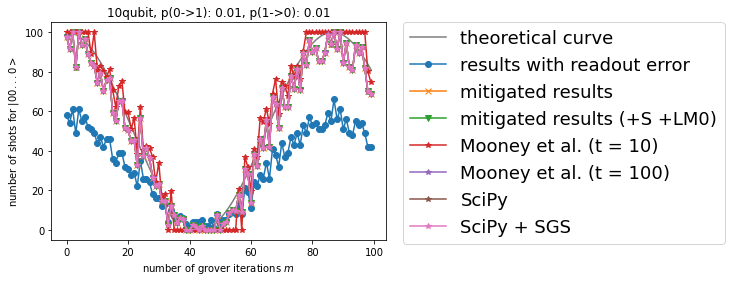

In [17]:
divide = 100
number_grover_list = [i for i in range(100)]
plt.plot(np.linspace(0,number_grover_list[-1], divide), 
         100 * np.cos(2 * np.linspace(0,number_grover_list[-1], divide) * np.arccos(np.sqrt(discretizedResult))) ** 2, 
         label="theoretical curve", color="C7")
plt.plot(number_grover_list, hit_list, marker="o", label="results with readout error", color="C0")
plt.plot(number_grover_list, mit_hit_list, marker="x", label="mitigated results", color="C1")
plt.plot(number_grover_list, mit_hit_S_lm_0_list, marker="v", label="mitigated results (+S +LM0)", color="C2")
plt.plot(number_grover_list, mit_hit_mooney10_list, marker="*", label="Mooney et al. (t = 10)", color="C3")
plt.plot(number_grover_list, mit_hit_mooney100_list, marker="*", label="Mooney et al. (t = 100)", color="C4")
plt.plot(number_grover_list, mit_hit_S_SciPy_list, marker="*", label="SciPy", color="C5")
plt.plot(number_grover_list, mit_hit_S_SciPy_SGS_list, marker="*", label="SciPy + SGS", color="C6")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.title("10qubit, p(0->1): 0.01, p(1->0): 0.01")
plt.xlabel("number of grover iterations $m$")
plt.ylabel("number of shots for $|00...0>$")

In [18]:
sin_hit_list = [100 - h for h in hit_list]
sin_mit_hit_list = [100 - h for h in mit_hit_list]
sin_mit_hit_S_lm_0_list = [100 - h for h in mit_hit_S_lm_0_list]
sin_mit_hit_mooney100_list = [100 - h for h in mit_hit_mooney100_list]
sin_mit_hit_mooney10_list = [100 - h for h in mit_hit_mooney10_list]
sin_mit_hit_S_SciPy_list = [100 - h for h in mit_hit_S_SciPy_list]
sin_mit_hit_S_SciPy_SGS_list = [100 - h for h in mit_hit_S_SciPy_SGS_list]

thetaCandidate_list = calculate_theta(
    sin_hit_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_list = calculate_theta(
    sin_mit_hit_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_lm_0_list = calculate_theta(
    sin_mit_hit_S_lm_0_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_mooney100_list = calculate_theta(
    sin_mit_hit_mooney100_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_mooney10_list = calculate_theta(
    sin_mit_hit_mooney10_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_SciPy_list = calculate_theta(
    sin_mit_hit_S_SciPy_list, number_grover_list, shots_list)  # list of estimated theta values
thetaCandidate_mit_S_SciPy_SGS_list = calculate_theta(
    sin_mit_hit_S_SciPy_SGS_list, number_grover_list, shots_list)  # list of estimated theta values

error_list = np.abs(np.sin(thetaCandidate_list)**2 - discretizedResult)  # list of estimation errors
error_mit_list = np.abs(np.sin(thetaCandidate_mit_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_lm_0_list = np.abs(np.sin(thetaCandidate_mit_S_lm_0_list)**2 - discretizedResult)  # list of estimation errors
error_mit_mooney100_list = np.abs(np.sin(thetaCandidate_mit_mooney100_list)**2 - discretizedResult)  # list of estimation errors
error_mit_mooney10_list = np.abs(np.sin(thetaCandidate_mit_mooney10_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_SciPy_list = np.abs(np.sin(thetaCandidate_mit_S_SciPy_list)**2 - discretizedResult)  # list of estimation errors
error_mit_S_SciPy_SGS_list = np.abs(np.sin(thetaCandidate_mit_S_SciPy_SGS_list)**2 - discretizedResult)  # list of estimation errors
OracleCall_list = []  # list of number of oracle calls
ErrorCramérRao_list = []  # list of Cramér-Rao lower bound
for i in range(len(number_grover_list)):
    OracleCall_list.append(
        CalcNumberOracleCalls(i, shots_list, number_grover_list))
    ErrorCramérRao_list.append(
        CalcErrorCramérRao(i, shots_list, discretizedResult, number_grover_list))

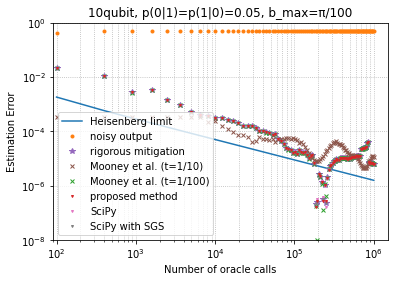

In [20]:
plt.clf()
p = plt.loglog( OracleCall_list, ErrorCramérRao_list)
p0 = plt.loglog( OracleCall_list, error_list, 'o', markersize=3)
p1 = plt.loglog( OracleCall_list, error_mit_list, '*', color='C4', markersize=6)
p2 = plt.loglog( OracleCall_list, error_mit_mooney100_list, 'x', color='C2', markersize=4)
p4 = plt.loglog( OracleCall_list, error_mit_mooney10_list, 'x', color='C5', markersize=4)
p5 = plt.loglog( OracleCall_list, error_mit_S_SciPy_list, 'v', color='C6', markersize=2)
p6 = plt.loglog( OracleCall_list, error_mit_S_SciPy_SGS_list, 'v', color='C7', markersize=2)
p3 = plt.loglog( OracleCall_list, error_mit_S_lm_0_list, 'v', color='C3', markersize=2)

plt.title("10qubit, p(0|1)=p(1|0)=0.05, b_max=π/100")
plt.xlim(OracleCall_list[0]*0.9, OracleCall_list[-1]*1.5)
plt.xlabel("Number of oracle calls")
plt.ylim(0.00000001, 1)
plt.ylabel("Estimation Error")
plt.grid(True, which="both", ls="dotted")
plt.legend((p[0], p0[0], p1[0], p4[0], p2[0], p3[0], p5[0], p6[0]),
           ("Heisenberg limit", "noisy output", "rigorous mitigation", "Mooney et al. (t=1/10)", "Mooney et al. (t=1/100)", "proposed method", "SciPy", "SciPy with SGS"))
plt.show()

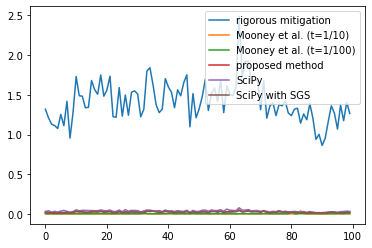

In [23]:
plt.clf()
p1 = plt.plot(ts_sgs)
p4 = plt.plot(ts_mooney10)
p2 = plt.plot(ts_mooney100)
p3 = plt.plot(ts_lm0_sgs)
p5 = plt.plot(ts_scipy)
p6 = plt.plot(ts_scipy_sgs)
plt.legend((p1[0], p4[0], p2[0], p3[0], p5[0], p6[0]),
           ("rigorous mitigation", "Mooney et al. (t=1/10)", "Mooney et al. (t=1/100)", "proposed method", "SciPy", "SciPy with SGS"))
plt.show()

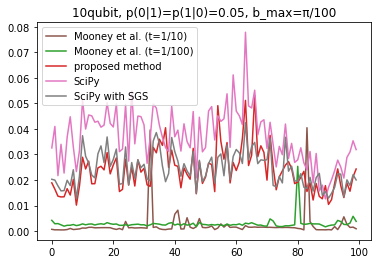

In [26]:
plt.clf()
p4 = plt.plot(ts_mooney10, color="C5")
p2 = plt.plot(ts_mooney100, color="C2")
p3 = plt.plot(ts_lm0_sgs, color="C3")
p5 = plt.plot(ts_scipy, color="C6")
p6 = plt.plot(ts_scipy_sgs, color="C7")
plt.title("10qubit, p(0|1)=p(1|0)=0.05, b_max=π/100")
plt.legend((p4[0], p2[0], p3[0], p5[0], p6[0]),
           ("Mooney et al. (t=1/10)", "Mooney et al. (t=1/100)", "proposed method", "SciPy", "SciPy with SGS"))
plt.show()